Šahovska otvaranja
==

Šah je strateška igra na ploči za dva igrača. Razvila se od indijske igre _chaturanga_ u sedmom stoljeću te zadobila moderni oblik i pravila u Europi u 15. stoljeću. Danas pravila turnirskog šaha propisuje Svjetska šahovska federacija (FIDE).\
U nastavku teksta pretpostavlja se da je čitatelj upoznat s osnovnim pravilima igre (u suprotnom, može pogledati priloženi video).

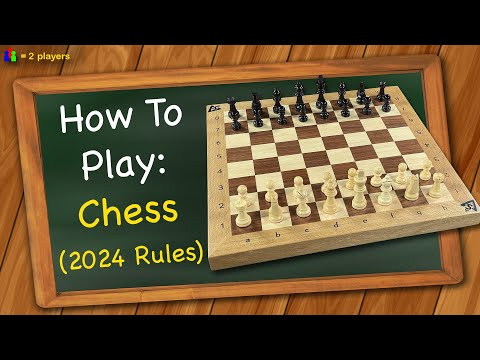

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('iPXcfS0UDlI')

Za prikaz šahovske ploče, koristimo Pythonov library `python-chess`. Osim toga upotrebljavamo biblioteke Numpy, Pandas i Matplotlib.

In [2]:
pip install chess

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... one
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147847 sha256=4ef0e83fd6124a3a1e2610f549908e994ea73bbafca9b06a0a8f87015ebcdde8
  Stored in directory: /home/student1/norberd/.cache/pip/wheels/83/1f/4e/8f4300f7dd554eb8de70ddfed96e94d3d030ace10c5b53d447
Successfully built chess
Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 92.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 100.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import chess
import io, chess.pgn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator as op

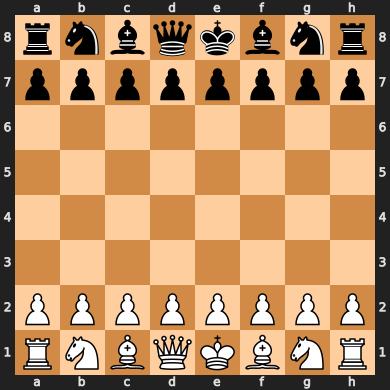

In [119]:
board = chess.Board()
board

### Ukratko o notaciji
Šahovska ploča sastoji se od 8 redaka označenih brojevima 1-8 te 8 stupaca označenih slovima a-h, pomoću kojih bilježimo polja. Na primjer, u početnoj poziciji, bijela dama je na polju d1, a crni kralj na e8.
Jedan potez sastoji se od pomicanja figure od strane oba igrača. Poteze bilježimo tzv. algebarskom notacijom, koristeći simbol za figuru te zapis polja na koji se pomiče, prvo za bijelog, a zatim za crnog igrača. Slova koja simboliziraju figure su sljedeća:
* K - kralj (king)
* Q - dama (queen)
* R - top (rook)
* B - lovac (bishop)
* N - skakač (knight).

Pješaci nemaju poseban simbol. Malu rohadu (na kraljevoj strani) označavamo s 0-0, a veliku (na daminoj strani) s 0-0-0. \
Ako figura daje šah, to označavamo s **+**, a ako daje mat s **#**. \
Ovu notaciju koristi i `python-chess` te pomoću nje možemo zadavati poteze, varijante i partije.

Zapišimo primjerice najbrži mogući mat:
1. g4 e5
2. f3 Qh4#

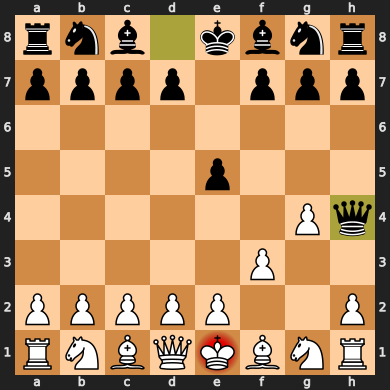

In [99]:
board.push_san("g4")
board.push_san("e5")
board.push_san("f3")
board.push_san("Qh4")
board

In [100]:
op.truth(board.is_checkmate())

True

Tipična šahovska partija sastoji se od tri dijela: otvaranja, središnjice i završnice. U nastavku proučavamo ideje raznih otvaranja te statistiku o njihovoj učestalosti i učinkovitosti, među majstorskim igračima i amaterima.

### Osnove

Otvaranje šahovske partije odvija se tijekom prvih 10-20 poteza. Neki od glavnih principa otvaranja su:
1. zauzimanje centra: kontroliranje polja e4, d4, e5 i d5, s pješacima ili figurama.
2. razvoj figura: uključivanje skakača i lovaca u igru.
3. rohada: micanje kralja iz centra i uvođenje topa u igru.
4. izbjegavanje igranja istom figurom više puta te ranog izvođenja dame.

Igrač koji postigne pozicionu ili materijalnu prednost u otvaranju često ju pažljivom igrom može održati do kraja te dobiti partiju. \
Teorija otvaranja vrlo je široka i dobro razvijena grana šaha, prisutna od samih njegovih početaka. Ona proučava moguće varijante i poteze u otvaranju. Većina otvaranja (koja uglavnom slijede navedene principe i igraju se na visokoj razini) ima dodjeljeno ime po državi ili igraču koji ga je razvio. 

Definiramo par pomoćnih funkcija za rad s potezima na ploči:

In [5]:
def moveList(game):
    """Funkcija koja vraća poteze u obliku liste, za lakse iteriranje po njima."""
    moves=[]
    for move in game.mainline_moves():
        moves.append(move)
    return moves

In [117]:
def play(board,moves):
    """Funkcija koja vraca plocu s odigranim sljedecim potezom iz liste."""
    if moves:
        if type(moves[0])==chess.Move: board.push(moves[0])
        else: board.push_san(moves[0])
        op.delitem(moves,0)
    return board

In [118]:
def playAll(board,moves):
    """Funkcija koja vraca plocu s odigranim svim potezima iz liste."""
    while moves:
        if type(moves[0])==chess.Move: board.push(moves[0])
        else: board.push_san(moves[0])
        op.delitem(moves,0)
    return board

In [121]:
def italian():
    """Varijanta talijanskog otvaranja."""
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. 0-0 Nf6 5. d3 0-0")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(italian())

Opetovanim pokretanjem donjeg koda vidimo primjer pozicije koja bi mogla nastati u otvaranju.

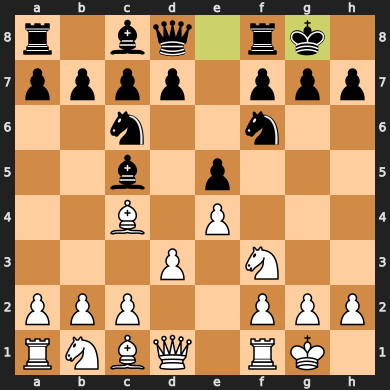

In [136]:
play(board,moves)

Otvaranje na ploči gore je varijanta tzv. talijanke, koja je jedno od najstarijih šahovskih otvaranja - razvijali su ju talijanski šahisti još u 16. st. Talijanka se često preporučuje početnicima, zato što slijedi osnovne principe i omogućava brz razvoj figura. Stavljajući lovca na c4, bijeli se odmah usmjerava prema najslabijem polju u crnoj poziciji, f7 (polje koje na početku brani samo kralj). Crni može odgovoriti na isti način i igrati lovcem na c5, ciljajući točku f2. Obje strane mogu brzo rohirati, uz mnoge mogućnosti za nastavak igre, često s napadom na protivničkog kralja.

Iz baze podataka dostupne na [chessgames.com](chessgames.com) dobivamo statistiku za moguće početne poteze, igrane u majstorskim partijama od 15. stoljeća do danas. U prošlosti, šahovskim 'majstorom' se smatrao bilo koji dobar igrač, dok danas majstorske titule dodjeljuje FIDE, igračima koji su postigli određeni šahovski rejting te ispunili potrebne uvjete. Igrači tako mogu postati FIDE majstori (rejting>2300), međunarodni majstori (>2400) i velemajstori (>2500).

In [10]:
start = pd.read_csv('start.txt', sep=r"\t\s*", engine='python')
start

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,"843,172",37.6%,32.5%,29.9%
1,1. d4,"624,840",37.5%,35.4%,27%
2,1. Nf3,"168,442",37.1%,37.9%,25.1%
3,1. c4,"129,019",38%,36.1%,25.9%
4,1. g3,"12,397",37.8%,35.4%,26.8%
5,1. f4,"6,780",33.2%,24.7%,42.1%
6,1. b3,"6,672",37.2%,29.5%,33.3%
7,1. Nc3,"2,816",38.1%,25.4%,36.5%
8,1. b4,"1,685",31.9%,22.8%,45.2%
9,1. e3,878,33.5%,20.6%,45.9%


Primjećujemo da je svih 20 mogućnosti za prvi potez (16 poteza pješacima i 4 skakačima) igrano u nekoj partiji te da su daleko najčešće igrani potezi e4, d4, Nf3 i c4 - sve potezi koji slijede osnovni princip zauzimanja centra.

Kako bismo mogli raditi sa brojevnim podatcima umjesto stringovima, definiramo pomoćnu funkciju.

In [11]:
def numeric(data):
    """Pomocna funkcija za pretvaranje stringovnih u brojevne podatke."""
    
    if(data['broj partija'].dtype!='int64'):
        data['broj partija'] = data['broj partija'].str.replace(",","")
        data['broj partija'] = pd.to_numeric(data['broj partija'])

    if(data['bijeli dobiva'].dtype!='float64'):
        data['bijeli dobiva'] = data['bijeli dobiva'].str.replace("%","")
        data['remi'] = data['remi'].str.replace("%","")
        data['crni dobiva'] = data['crni dobiva'].str.replace("%","")

        data['bijeli dobiva'] = pd.to_numeric(data['bijeli dobiva'])
        data['remi'] = pd.to_numeric(data['remi'])
        data['crni dobiva'] = pd.to_numeric(data['crni dobiva'])

    return data

In [101]:
start = numeric(start)
start.head(4)

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,843172,37.6,32.5,29.9
1,1. d4,624840,37.5,35.4,27.0
2,1. Nf3,168442,37.1,37.9,25.1
3,1. c4,129019,38.0,36.1,25.9


In [106]:
def winstat(data,headstart=-1,tailend=-1):
    """Funkcija koja ispisuje prosjecni rezultat u postotcima."""
    if headstart>0: 
        data=data.head(headstart) 
    elif tailend>0:
        data=data.tail(tailend)
    headstart=tailend=op.length_hint(data)
        
    suma=data['broj partija'].sum()
    bijeli=remi=crni=0
    for i in range(headstart):
        bijeli+=data['broj partija'][i]*data['bijeli dobiva'][i]/100
        remi+=data['broj partija'][i]*data['remi'][i]/100
        crni+=data['broj partija'][i]*data['crni dobiva'][i]/100
    
    print("Bijeli dobiva u", round(bijeli*100/suma,3), "posto partija.")
    print("Remi se dogodi u", round(remi*100/suma,3), "posto partija.")
    print("Crni dobiva u", round(crni*100/suma,3), "posto partija.")

In [107]:
winstat(start)

Bijeli dobiva u 37.526 posto partija.
Remi se dogodi u 34.209 posto partija.
Crni dobiva u 28.239 posto partija.


Dakle, na visokom nivou, pravo prvog poteza ipak donosi bijelom prednost - on ima osjetno veće šanse za pobjedu od crnog. Međutim, i remi je skoro jednako čest.

Pogledajmo sad statistiku za partije igrača svih razina, igranih na Free Internet Chess Serveru (FICS). Njihova baza podataka dostupna je na [ficsgames.org](https://www.ficsgames.org/). U nastavku teksta ovi igrači se nazivaju "amaterima", no njihova snaga varira od potpunih početnika do iskusnijih klupskih igrača.

In [15]:
noobstart = pd.read_csv('ficsstart.txt', sep=r"\t\s*", engine='python')
noobstart

,Move,Games,[%],Win%,Black wins,Draws,White wins
0,Total,1284100,100.0%,52.3%,None,None,None
1,1. e4,652053,50.8%,50.6%,43%,13%,44%
2,1. d4,403573,31.4%,54%,38%,16%,46%
3,1. Nf3,83978,6.5%,56.3%,34%,20%,46%
4,1. c4,80629,6.3%,56.9%,35%,17%,48%
5,1. f4,13774,1.1%,52.1%,43%,9%,48%
6,1. e3,8291,0.6%,37%,60%,6%,34%
7,1. b3,7824,0.6%,50.2%,44%,11%,45%
8,1. g3,7699,0.6%,47.2%,46%,14%,40%
9,1. Nc3,7111,0.6%,52.4%,44%,7%,49%


Prilagođavamo ove podatke kako bi bili istog oblika kao prethodni:

In [16]:
def adjust(data):
    """Pomocna funkcija za sredjivanje podataka."""
    data.pop('Win%')
    data.pop('[%]')
    data = data.reindex(columns=['Move','Games','White wins','Draws','Black wins'])
    data = data.rename({'Move': 'potez', 'Games': 'broj partija',
                        'White wins': 'bijeli dobiva', 'Draws': 'remi',
                        'Black wins': 'crni dobiva'}, axis='columns')
    data = data.drop([0])
    data['potez'] = data['potez'].str.replace("1.  ... ","1...")
    data.index -= 1 
    data = numeric(data)
    return data

In [17]:
noobstart = adjust(noobstart)
noobstart.head(4)

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,652053,44,13,43
1,1. d4,403573,46,16,38
2,1. Nf3,83978,46,20,34
3,1. c4,80629,48,17,35


In [18]:
winstat(noobstart)

Bijeli dobiva u 45.01 posto partija.
Remi se dogodi u 14.425 posto partija.
Crni dobiva u 40.565 posto partija.


Vidljivo je da i kod amatera bijeli zadržava prednost, no crni ipak ima bolje šanse za pobjedu nego u majstorskim partijama.\
Također, kod amaterskih igrača, remi se znatno rjeđe postiže.

Učestalost pojedinih početnih poteza možemo vidjeti i na grafu:

In [114]:
def freq(data, headstart=-1, tailend=-1):
    """Funkcija za računanje frekvencije igranih poteza."""
    
    suma=data['broj partija'].sum()
    
    if headstart>0: 
        data=data.head(headstart)
    elif tailend>0:
        data=data.tail(tailend)
    headstart=tailend=data.shape[0]

    percent=[]
    for i in range(headstart):
        percent.append(op.getitem(data['broj partija'], data.index[i])/suma*100)

    return data, percent

In [115]:
def compare(data1,data2,headstart=-1,tailend=-1):
    """Funkcija za usporedbu frekvencije igranih poteza u linijskom grafu."""
    
    data1,perc1=freq(data1,headstart,tailend)
    data2,perc2=freq(data2,headstart,tailend)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(data1['potez'],perc1,
            'o-',linewidth=2, color='black')
    ax2.plot(data2['potez'],perc2,
            'o-',linewidth=2, color='grey')

    ax1.set_ylabel('postotak')
    ax1.set_title("Majstori")
    ax2.set_title("Amateri")
    plt.show()

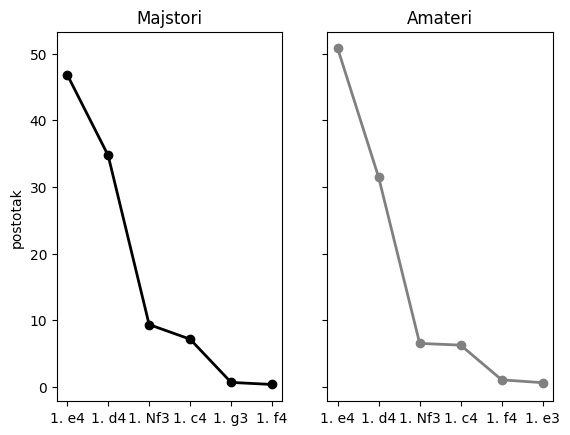

In [116]:
compare(start,noobstart,headstart=6)

U obje kategorije daleko je najčešći potez 1. e4, kojim počinju tzv. otvorene igre, kao što je talijanka koju smo vidjeli gore. Međutim, majstori češće igraju zatvorene igre s početkom 1. d4 nego amateri. Pogledajmo učestalost manje popularnih poteza:

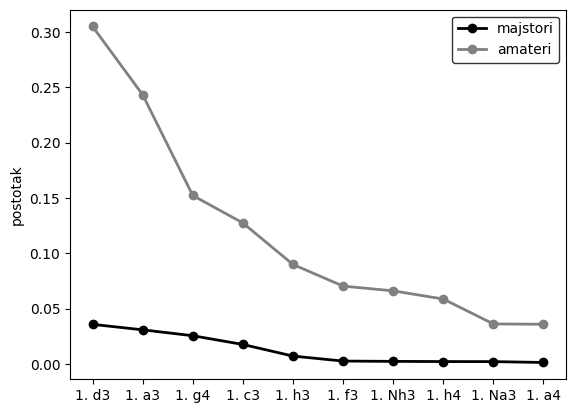

In [23]:
x = start['potez'].tail(10)
data, y1 = freq(start,tailend=10)
data, y2 = freq(noobstart,tailend=10)

fig, ax = plt.subplots()
plt.plot(x, y1, 'o-', label='majstori', linewidth=2, color='black')
plt.plot(x, y2, 'o-', label='amateri', linewidth=2, color='grey')
ax.legend(loc="best", edgecolor='black')
ax.set_ylabel('postotak')

plt.show()

In [24]:
print("Ukupno majstorskih partija:", start['broj partija'].sum())
print("Ukupno amaterskih partija:", noobstart['broj partija'].sum())
print("Broj majstorskih partija s nestandardnim otvaranjima:", start['broj partija'][4:].sum())
print("Broj amaterskih partija s nestandardnim otvaranjima:", noobstart['broj partija'][4:].sum())

Ukupno majstorskih partija: 1798984
Ukupno amaterskih partija: 1284100
Broj majstorskih partija s nestandardnim otvaranjima: 33511
Broj amaterskih partija s nestandardnim otvaranjima: 63867


Kao što i očekujemo, majstori znatno rjeđe igraju nestandardne poteze. Možemo uočiti da, unatoč manjem broju amaterskih partija u korištenim bazama podataka, ima skoro dvostruko više partija s manje principijelnim početnim potezima (dakle, potezima različitih od e4, d4, c4 ili Nf3) kod amatera nego kod majstora. Takvi su potezi česti kod igrača koji su se tek počeli upoznavati sa šahom i ne znaju osnovne ideje otvaranja. (Na primjer, sigurno ste i sami kao početnici nekad imali ideju igrati 1. a4 ili 1. h4, kako biste što prije "oslobodili" topove. :) U takvim partijama pravo prvog poteza ne donosi bijelom značajnu prednost, naprotiv, ako ga crni kazni za lošu igru u otvaranju, bijeli može upasti u goru poziciju te izgubiti.

Pogledajmo i statistiku početnih poteza s obzirom na rezultat partije:

In [25]:
def graph(data, title, headstart=-1, tailend=-1):
    """Funkcija za prikaz rezultata partija u % na stupcastom grafu."""
    
    if headstart>0: 
        data=data.head(headstart) 
    elif tailend>0:
        data=data.tail(tailend)
    headstart=tailend=data.shape[0]
        
    fig, ax = plt.subplots()
    ax.set(ylim=(0, 100))
    
    rezultat = {'bijeli dobiva': data['bijeli dobiva'],
                'remi': data['remi'],
                'crni dobiva': data['crni dobiva']}
    colors = ['1', '0.8', '0']
    
    bottom = np.zeros(headstart)
    i=0
    for boolean, rez in rezultat.items():
        bar = ax.bar(data['potez'], rez, label=boolean, bottom=bottom, color=colors[i], edgecolor='black')
        bottom += rez
        i+=1
    ax.set_ylabel('rezultat u postotcima')
    ax.set_title(title)
    ax.legend(loc="best", edgecolor='black')
    
    plt.show()

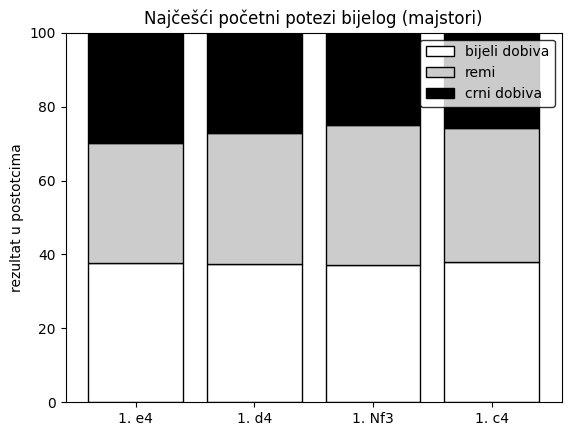

In [26]:
graph(start, title="Najčešći početni potezi bijelog (majstori)", headstart=4)

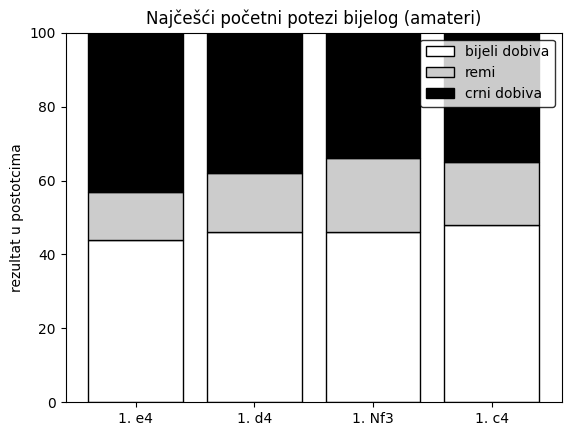

In [27]:
graph(noobstart,title="Najčešći početni potezi bijelog (amateri)", headstart=4)

Na oba grafa vidimo da otvorene igre opravdavaju svoju reputaciju kao oštre i agresivne, time što najrjeđe rezultiraju remijem od glavnih početnih poteza, te nude najbolje šanse za igru na pobjedu crnom. No, razlike u postotcima za sva četiri otvaranja ni na jednom grafu nisu prevelike - sva mogu dovesti do male prednosti bijelog. Naravno, vrijedi ono što smo spomenuli već kod sveukupne statistike - kod amatera je znatno manje remija nego kod majstora. \
Pogledajmo situaciju kod nestandardnih poteza:

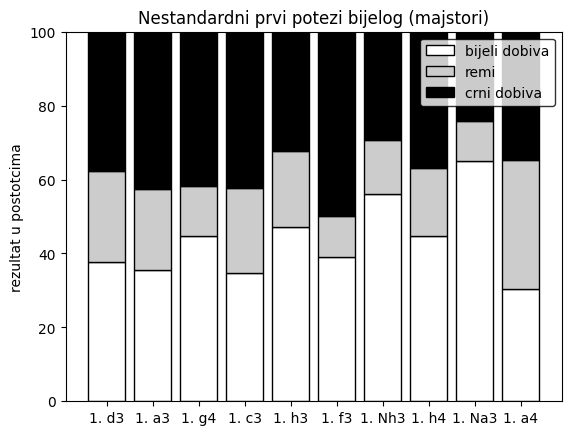

In [28]:
graph(start, title="Nestandardni prvi potezi bijelog (majstori)", tailend=10)

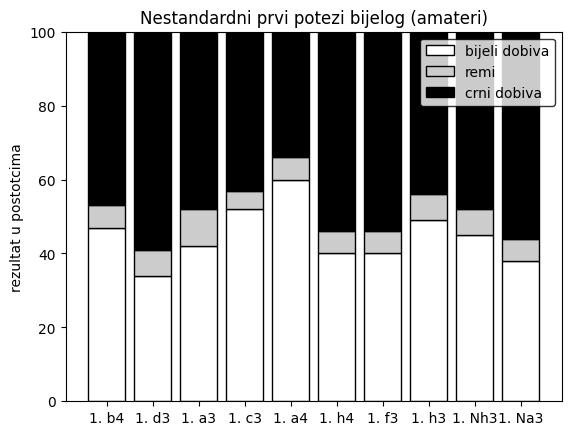

In [29]:
graph(noobstart,title="Nestandardni prvi potezi bijelog (amateri)",tailend=10)

Vidljivo je da takvi potezi uglavnom poboljšavaju crnom šanse za pobjedu, pogotovo kod amatera, pa ih treba izbjegavati kao bijeli.

### Otvorene igre
Partije koje nastaju nakon početnog poteza 1. e4 nazivaju se otvorenim igrama. Često vode do oštre i agresivne borbe te nude mnogo mogućnosti za napad i kombinacije.
Pogledajmo najčešće odgovore crnog, prvo u majstorskim, a zatim u amaterskim partijama:

In [30]:
e4 = pd.read_csv('e4.txt', sep=r"\t\s*", engine='python')
e4 = numeric(e4)
e4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...c5,355027,36.0,31.9,32.1
1,1...e5,225145,38.1,34.5,27.4
2,1...e6,102101,39.6,32.5,27.9
3,1...c6,63996,36.9,35.0,28.1
4,1...d6,30698,41.1,29.3,29.6
5,1...g6,24093,37.3,27.6,35.2
6,1...d5,18186,43.3,28.1,28.6
7,1...Nf6,16898,40.2,29.4,30.4
8,1...Nc6,4678,42.3,24.5,33.1
9,1...b6,1713,46.1,23.3,30.6


In [31]:
noobe4 = pd.read_csv('ficse4.txt', sep=r"\t\s*", engine='python')
noobe4 = adjust(noobe4)
noobe4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...c5,230137,40,14,46
1,1...e5,206746,44,14,42
2,1...e6,78019,47,14,39
3,1...c6,45183,41,15,44
4,1...d5,25191,51,9,40
5,1...d6,20969,51,12,37
6,1...Nf6,14128,48,11,41
7,1...g6,11418,52,12,36
8,1...Nc6,8590,51,8,41
9,1...b6,3292,53,6,41


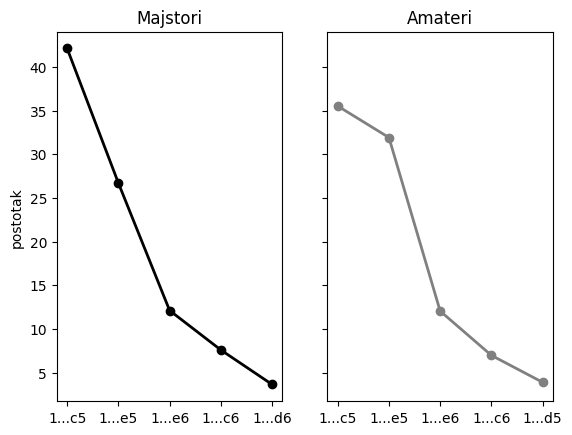

In [32]:
compare(e4,noobe4,headstart=5)

Kod majstora je daleko najpopularniji potez 1...c5, kojim počinje tzv. sicilijanka. Potez 1...e5 koji je na drugom mjestu, i koji je uvod u otvaranja kao što su talijanka i španjolka, ipak se igra rjeđe. Kod amatera su ta dva poteza bliža u popularnosti. Nakon toga slijede potezi 1...e6, koji karakterizira francusku obranu, i 1...c6, kojim počinje Caro-Kannova obrana. Sva ova otvaranja ćemo vidjeti u nastavku.

Sicilijanska obrana je vrlo teorijski razvijeno otvaranje bogato varijantama i mogućnostima za napad za oba igrača. Jedna od glavnih je Najdorfova varijanta nazvana po njenom tvorcu, argentinskom šahistu Miguelu Najdorfu.

In [33]:
def najdorf():
    pgn = io.StringIO("1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 a6")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(najdorf())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

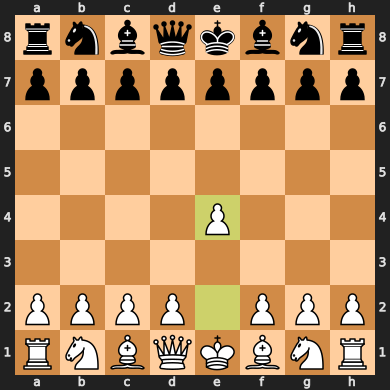

In [34]:
play(board,moves)

Crni igra c5 kako bi razmjenio svog c pješaka za centralnog d pješaka bijelog te tako oslabio kontrolu bijelog nad centrom. Nakon standardnog razvoja skakača slijedi na prvu pomalo neobičan Najdorfov potez a6. Njegov cilj je kontrola nad poljem b5, na koje bi inače mogao uskočiti jedan od bijelih skakača, te priprema za napredovanje crnim b pješakom (sa b7 na b5 i b4, gdje tjera bijelog skakača s c3). Crnom je obično plan rohirati na kraljevu stranu i napadati bijelog na daminoj. Bijeli ima izbor: rohirati na kraljevu stranu, što je mirnija opcija, ili na daminu stranu te napadati crnog na kraljevoj. To su posebno oštre partije.

---

Španjolka ili Ruy Lopez nazvana je po španjolskom svećeniku koji ju je osmislio u 16. st. Prema predaji, Ruy Lopez je planirao igrati talijanku, no slučajno je odigrao lovcem na b5 umjesto c4. Nakon toga je uvidio da i ovaj potez ima svojih prednosti te počeo razvijati teoriju.
Nakon Bb5, bijeli naizgled prijeti uzeti crnog skakača i zatim pješaka na e5 kojeg on brani, no poznato je da u toj varijanti crni lako vraća pješaka:

In [35]:
def exchangespanish():
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Bxc6 dxc6 5. Nxe5 Qd4 6. Nf3 Qxe4")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(exchangespanish())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

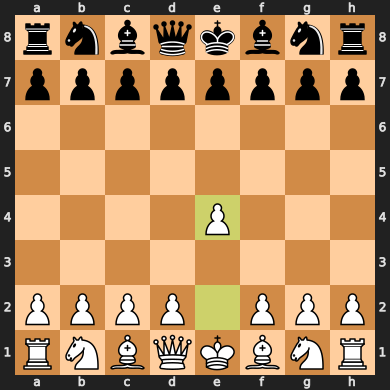

In [36]:
play(board,moves)

Zbog toga, crni se ne plaši tog poteza te igra a6 (u glavnoj varijanti), tjerajući bijelog lovca da se izjasni. Lovac se obično miče na a4 i kasnije,
kad ga crni tjera i otamo, na b3, gdje ima pristup dugoj dijagonali a2-g8. Nakon što crni igra Nf6, napadajući pješaka na e4, bijeli obično taj napad
ignorira rohadom. Crni ima opciju uzeti na e4, pri čemu nastaje rjeđa varijanta, otvorena španjolka (u kojoj bijeli obično vrati pješaka uz dobru poziciju). Ako ne uzme na e4, već nastavi razvoj figura, nastaje zatvorena španjolka. U obje varijante postoje duboke teoretske analize, koje često sežu i do 20. poteza.

In [37]:
def ruylopez():
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. 0-0 Be7 6. Re1 b5 7. Bb3 0-0 8. c3")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(ruylopez())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

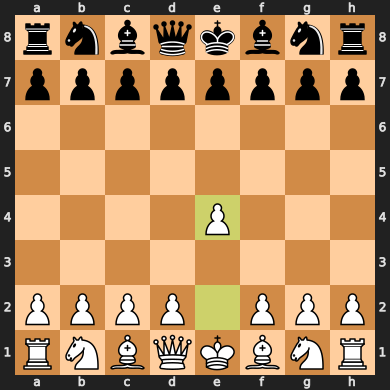

In [38]:
play(board,moves)

Bijelom je obično cilj zauzeti centar igranjem pješaka na d4, čime također otvara put za razvoj skakaču i crnopoljnom lovcu. Crni može držati centar s d6 ili žrtvovati pješaka igrajući d5, što je uvod u agresivni Marshallov gambit, gdje crni postiže jak napad koji bijeli može neutralizirati samo uz jako preciznu igru.

---

Francuska obrana karakterizirana je potezom 1. e4 e6. Ideja crnog je za početak dopustiti bijelom da zauzme više prostora pješacima u centru, kako bi ih kasnije mogao napasti (primjerice, potezom c5). Smatra se vrlo čvrstim otvaranjem za crnog koje je bijelom teško za probiti, no ima i svoje nedostatke, kao što je manjak prostora te bjelopoljni lovac na c8 kojeg je, zbog toga što mu pješaci zagrađuju put, teško razviti.

In [39]:
def french():
    pgn = io.StringIO("1.e4 e6 2.d4 d5 3.Nc3 Bb4 4.e5 c5 5.a3 Bxc3+ 6.bxc3 Ne7")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(french())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

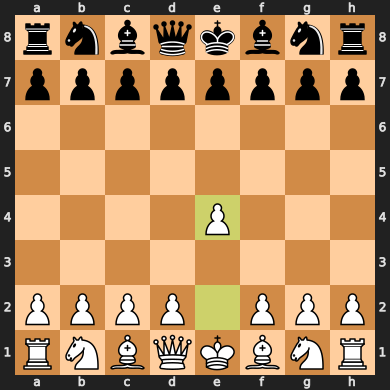

In [40]:
play(board,moves)

Gornja varijanta je samo jedna od brojnih. Iako francuska nije toliko popularna kao prethodno pokazana otvaranja, ipak ima svojih zagovaratelja te je od prošlog stoljeća stalno prisutna na visokom nivou.

---

Otvaranje sa sličnom idejom je Caro-Kannova obrana, koja počinje potezom 1...c6. Crni opet želi prepustiti bijelom prostor u centru, no ovaj put ostavlja otvoren put svom lovcu sa c8. Caro-Kann se smatra još defanzivnijim otvaranjem s manje mogućnosti napada od francuske obrane, zbog čega je često oružje pozicionih igrača.

In [41]:
def caro():
    pgn = io.StringIO("1.e4 c6 2.d4 d5 3.Nc3 dxe4 4.Nxe4 Bf5 5.Ng3 Bg6")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(caro())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

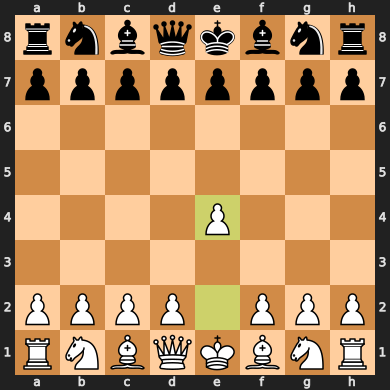

In [42]:
play(board,moves)

Dok se u gornjoj varijanti bijeli u trećem potezu odlučuje na razvoj skakača, umjesto toga može i napredovati pješakom na e5 (Advance Caro-Kann) ili uzeti crnog pješaka na d5 (Exchange Caro-Kann), što su također popularne opcije. Daljnjim razvojem figura oba igrača mogu doći do dobre pozicije.

---

Pogledajmo statistiku rezultata u navedenim otvaranjima na grafu:

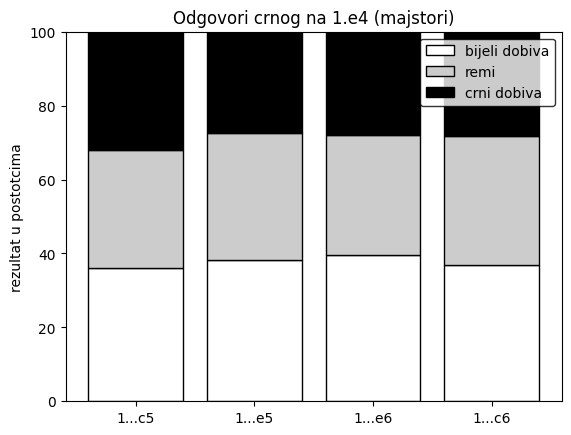

In [43]:
graph(e4,title="Odgovori crnog na 1.e4 (majstori)",headstart=4)

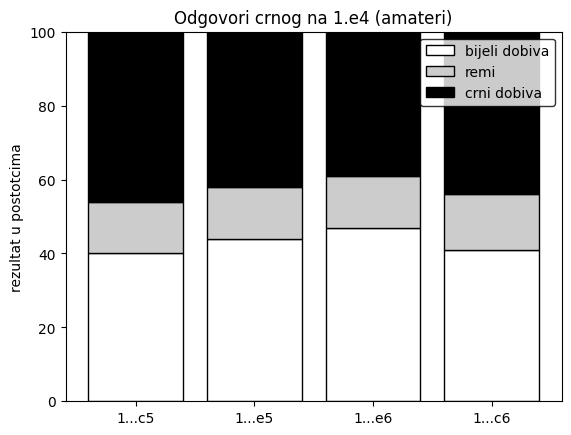

In [44]:
graph(noobe4,title="Odgovori crnog na 1.e4 (amateri)",headstart=4)

Za obje grupe igrača, sicilijanka donosi crnom najbolje šanse za pobjedu, a kod amatera crni čak češće pobjeđuje nego bijeli. Baš zato što je sicilijanka toliko teorijski razvijeno otvaranje, igrač koji bolje poznaje teoriju - glavne ideje otvaranja, moguće odgovore na poteze protivnika - je u prednosti. Ako bijeli igrač nije često sretao sicilijanku, dobro pripremljeni crni igrač ga može iznenaditi. Jasno, to ne vrijedi na majstorskom nivou, gdje su svi igrači dobro upoznati s glavnim otvaranjima, pa bijeli i dalje zadržava malu prednost od toga što vuče prvi potez. \
Nadalje, kod majstora su šanse za pobjedu bijelom podjednake kod svih otvaranja, dok su kod amatera veće razlike. Vidimo da u obje grupe najbolju šansu za pobjedu bijeli ima ako mu protivnik odabere francusku obranu. Zbog toga što crni prepušta centar te ima manje prostora za manevriranje figurama, to je otvaranje početnicima često teško za igrati s crnima. S druge strane, otvaranja poput talijanke, španjolke i Caro-Kanna, koja omogućavaju prirodniji razvoj figura i tijek igre, bolje kotiraju kod amatera i šanse za pobjedu su podjednake.

### Zatvorene igre
Pozicije koje nastaju nakon poteza 1.d4 nazivaju se zatvorenim igrama. One tipično nude manje mogućnosti za napad te mirniju, pozicionu igru.

In [45]:
d4 = pd.read_csv('d4.txt', sep=r"\t\s*", engine='python')
d4 = numeric(d4)
d4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...Nf6,381786,36.3,35.8,27.9
1,1...d5,161561,39.4,36.9,23.8
2,1...e6,26897,38.5,34.0,27.5
3,1...f5,17036,41.8,28.8,29.4
4,1...d6,15765,37.6,31.9,30.5
5,1...g6,15062,38.4,29.6,32.0
6,1...c5,6281,42.9,26.7,30.4
7,1...Nc6,1171,44.0,24.9,31.1
8,1...c6,1059,49.1,28.0,22.9
9,1...b6,641,45.1,23.9,31.0


In [46]:
noobd4 = pd.read_csv('ficsd4.txt', sep=r"\t\s*", engine='python')
noobd4 = adjust(noobd4)
noobd4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...Nf6,205315,41,18,41
1,1...d5,125049,48,17,35
2,1...e6,22740,52,14,34
3,1...f5,11345,49,13,38
4,1...c5,9241,59,7,34
5,1...d6,8591,50,16,34
6,1...g6,7991,54,14,32
7,1...Nc6,2572,59,7,34
8,1...c6,2510,63,9,28
9,1...e5,1704,59,5,36


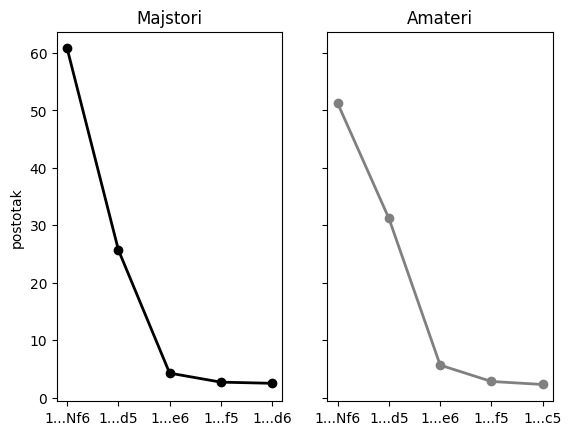

In [47]:
compare(d4,noobd4,headstart=5)

Kod majstora, daleko najčešći nastavak crnog je 1.d4 Nf6. Međutim, i nastavci 1...d5 i 1...e6 često transpozicijom - drugim redosljedom poteza - dovode do istih pozicija. Ideja igranja prvog poteza skakačem je skrivanje namjera od bijelog, koji nakon tog poteza još ne može znati koju će varijantu crni naposlijetku odabrati, dok 1...d5 uglavnom signalizira da crni ulazi u neku varijantu daminog gambita. Ova ideja je dosta suptilna pa ne čudi da ju kod amatera više igrača zanemaruje i odmah igra d5.

Damin je gambit glavna zatvorena igra. Karakterizira ju sljedeća pozicija:

In [56]:
def qgd():
    pgn = io.StringIO("1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. Nc3 c6 5. e3 Nbd7")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(qgd())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

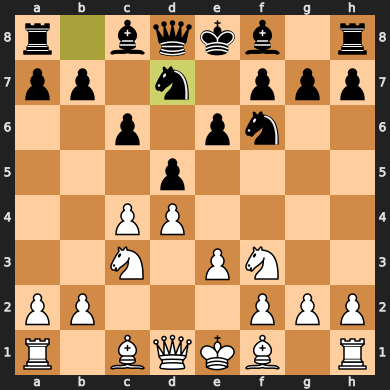

In [67]:
play(board,moves)

Do iste pozicije moglo se doći i drugim redosljedom poteza:

In [68]:
def qgdtranspose():
    pgn = io.StringIO("1. d4 d5 2. c4 e6 3. Nc3 Nf6 4. Nf3 c6 5. e3 Nbd7")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(qgdtranspose())

Svakim pokretanjem donjeg koda prikazuje se idući potez na ploči.

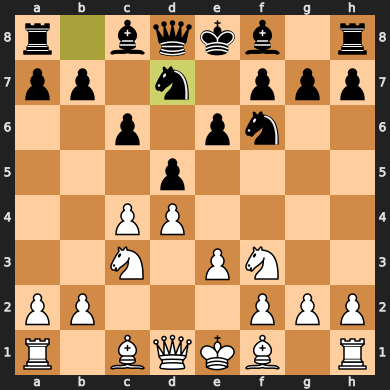

In [79]:
play(board,moves)

Gambitom (od tal. _dare il gambetto_, podmetnuti nogu) se nazivaju otvaranja u kojima jedan od igrača nudi žrtvu, najčešće pješaka, kako bi postigao druge prednosti u poziciji (npr. brz razvoj ili napad). U daminom gambitu bijeli žrtvuje pješaka c4. U slučaju da crni uzme i pokuša zadržati svog pješaka više, ulazi u varijantu prihvaćenog daminog gambita (QGA), no češći je odbijeni damin gambit (QGD) kao na ploči gore. Crni je svjestan da u slučaju uzimanja na c4 bijeli može ili brzo vratiti pješaka ili igrati korisne razvojne poteze dok je crni zauzet obranom svog pješaka. Također, uzimanjem bi crni razmjenio svog centralnog d pješaka za c pješaka bijelog te tako sebi otežao kontrolu nad centrom. Zbog toga se crni rađe fokusira na razvoj te držanje centra.

---

Do značajno drukčije igre može dovesti kraljeva indijska obrana (KID), koja uvijek počinje s 1...Nf6. Indijskim obranama nazivaju se razna otvaranja koja uključuju fijanketo lovca (karakterističnu trokutnu formaciju tri pješaka, s lovcem u sredini), koja se u KID javlja na kraljevoj strani crnog. Dok bijeli može igrati standardno kao u daminom gambitu te čak i brže zauzeti centar s potezom e4, crni se fokusira na brz razvoj figura i kasniji napad na bijelog kralja.

In [80]:
def kid():
    pgn = io.StringIO("1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 O-O 6. Be2 e5")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(kid())

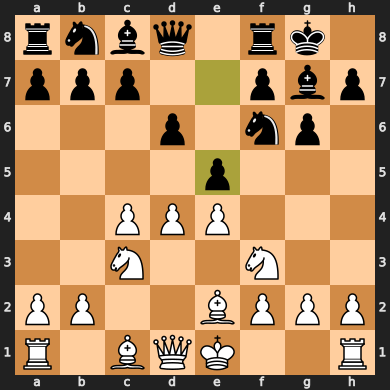

In [92]:
play(board,moves)

Nakon što crni igra e5, prisiljava bijelog da razjasni situaciju u centru. Najčešći odgovor bijelog je zauzimanje dodatnog prostora napredovanjem pješaka na d5. Kad centar postane fiksiran (pješaci se međusobno više ne napadaju), crni se fokusira na operacije na kraljevom krilu (kao što su micanje skakača s f6 kako bi odigrao pješakom f5, pa kasnije f4 ili g5, provodeći pješački napad), a bijeli priprema protuudar na daminom krilu (npr. igranjem Le3 i c5). Mnogi igrači s bijelim ne vole tu (glavnu) varijantu KID upravo zbog mogućnosti crnog za napad, pa rađe biraju sporedne, mirnije varijante.

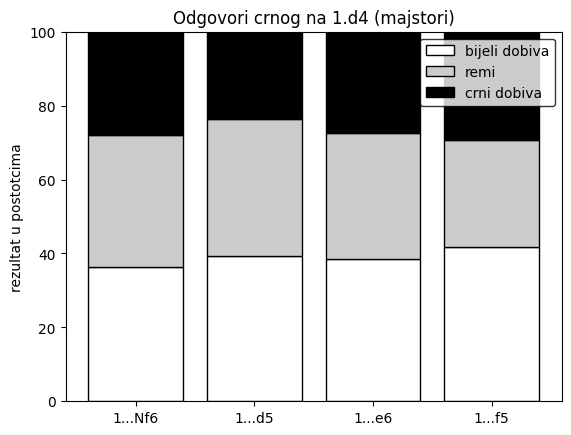

In [137]:
graph(d4,title="Odgovori crnog na 1.d4 (majstori)",headstart=4)

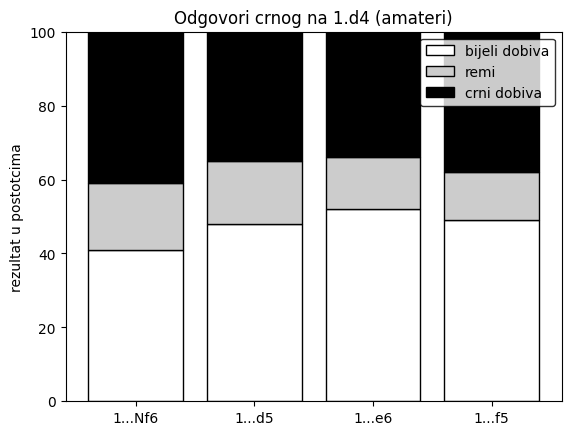

In [138]:
graph(noobd4,title="Odgovori crnog na 1.d4 (amateri)",headstart=4)

Vidimo da kod amatera najbolju šansu crnom za pobjedu nudi 1...Nf6, koji je u početničkim partijama češće uvod u kraljevu indijku nego damin gambit, za koji će igrati uglavnom igrati 1...d5 ili 1...e6. Vidimo da u tom slučaju bijelom rastu šanse na pobjedu. Kod majstora su postotci za ova otvaranja prilično izjednačeni, i 1...Nf6 češće predstavlja uvod u damin gambit, koji se na visokoj razini smatra solidnijim otvaranjem od kraljeve indijke.

### Zaključak (upute za amatere)

Ako posjetite neku online stranicu za igranje šaha ili čak uživo odete na turnir, većina protivnika s kojima ćete se susresti znat će barem nešto teorije otvaranja. Zato je korisno za početničke igrače, nakon upoznavanja s osnovnim principima, odabrati neka od gore spomenutih otvaranja koja odgovaraju njihovom stilu i proučiti njihove varijante, ideje, pa i moguće zamke u koje bi ih htio uloviti protivnik. Potez 1. e4 je česta preporuka zbog širine igre koju nudi, ali to je dvosjekli mač - ako se odluči za otvorene igre, bijeli bi trebao biti upoznat sa brojnim mogućim odgovorima crnog. S druge strane, potez 1. d4 nudi crnom manje izbora, ali i mirniju, "dosadniju" poziciju bijelom. Kao crni, bolje je za početnike birati manje teorijski složene obrane poput 1...e5 ili Caro-Kanna, dok ne postanu nešto iskusniji te se mogu uhvatiti ukoštac s otvaranjima poput sicilijanke. \
Otvaranje je izrazito važan dio šahovske partije, ali za pobjedu, dobro otvaranje treba slijediti domišljatošću u središnjici te preciznom igrom u završnici. Riječima bivšeg svjetskog prvaka i jednog od najboljih igrača svih vremena, Mihaila Talja: 
> “You must take your opponent into a deep dark forest where 2+2=5, and the path leading out is only wide enough for one.”